### Import Dataset and Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

In [2]:
import os
os.chdir('Desktop')

In [3]:
data = pd.read_csv('Resume.csv')

In [4]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
data.shape

(962, 2)

In [6]:
data.isnull().sum()

Category    0
Resume      0
dtype: int64

<AxesSubplot:>

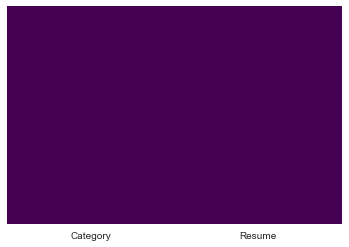

In [7]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

it cleary shows that we don't have any null values in the dataset

### Step 2: Exploratory Data Analysis

Lets explore what all unique job roles we have in the dataset

In [8]:
category = data['Category'].value_counts().reset_index()
category

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


<AxesSubplot:xlabel='count', ylabel='Category'>

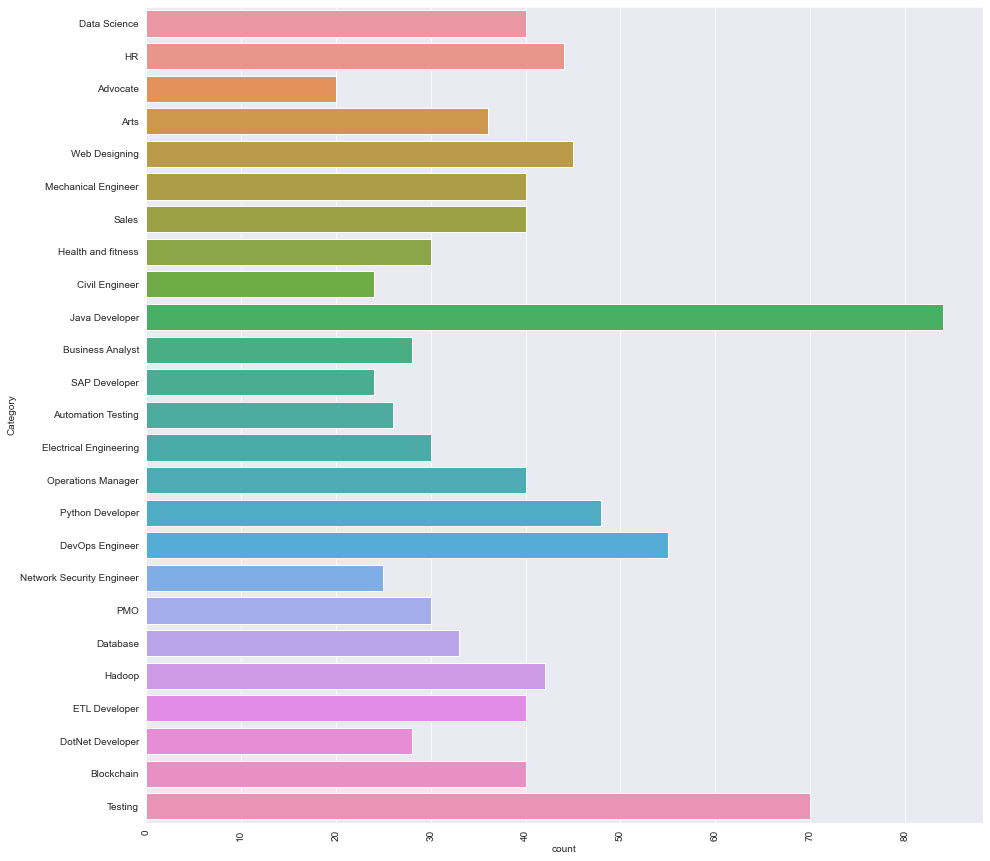

In [9]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category",data=data)

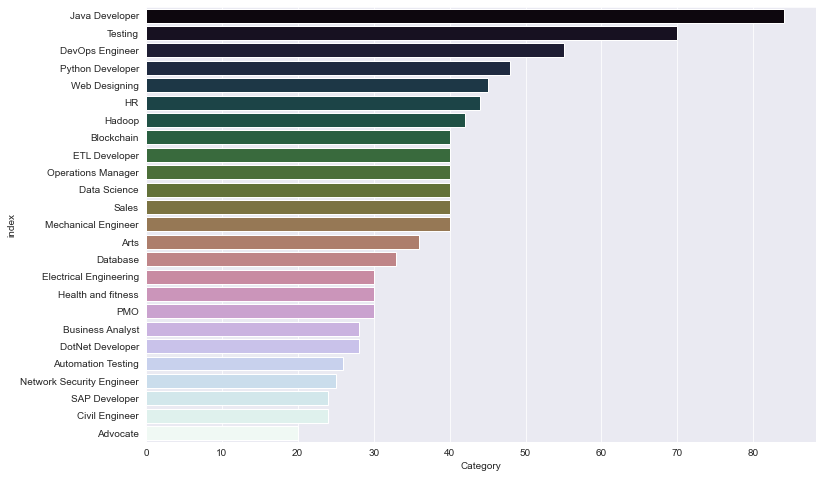

In [10]:
plt.figure(figsize=(12,8))
sns.barplot(x=category['Category'], y=category['index'], palette='cubehelix')
plt.show()

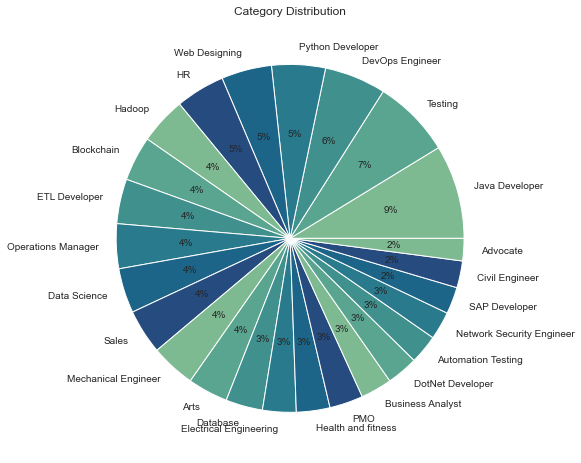

In [11]:
plt.figure(figsize=(12,8))
plt.pie(category['Category'], labels=category['index'],
        colors=sns.color_palette('crest'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

As per above graphs we can say that majority of the resumes are for Java Developer, Testing and DevOps Engineer

In [12]:
from matplotlib.gridspec import GridSpec
UniqueCounts=data["Category"].value_counts()

In [13]:
UniqueLabels=data["Category"].unique()

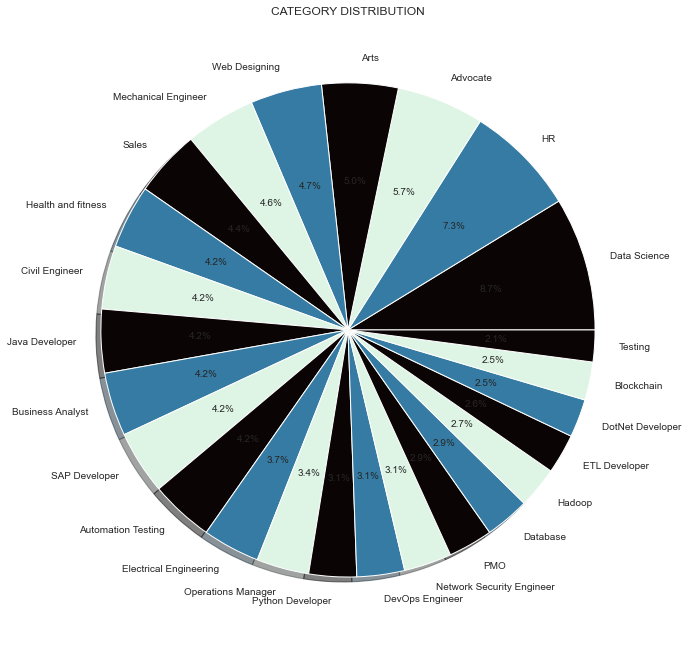

In [14]:
plt.figure(1,figsize=(25,25))
the_grid=GridSpec(2,2)

cmap = plt.get_cmap('mako')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie=plt.pie(UniqueCounts,labels=UniqueLabels,autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()


### Step3: Data cleaning

#### In resume column we have many junk characters which required cleaning the dataset for better understanding the data

In [15]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [16]:
data['cleaned'] = data['Resume'].apply(lambda x:cleanResume(x))
data.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [17]:
#getting the entire resume text
corpus=" "
for i in range(0,len(data)):
    corpus= corpus+ data["cleaned"][i]

In [18]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import WordCloud

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [19]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
len(tokens)

411913

In [20]:
# Covert all in lower case
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
words[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [21]:
# Dataset required label encoding as we have categorical variable
label = LabelEncoder()
data['new_Category'] = label.fit_transform(data['Category'])
data.head()

,Category,Resume,cleaned,new_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6


<AxesSubplot:xlabel='new_Category'>

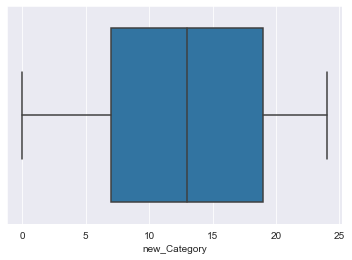

In [22]:
sns.boxplot(x=data["new_Category"])

<AxesSubplot:xlabel='new_Category', ylabel='Density'>

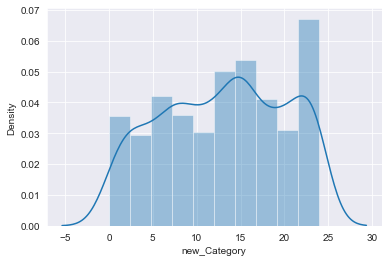

In [23]:
sns.distplot(data['new_Category'])

<AxesSubplot:xlabel='new_Category', ylabel='Category'>

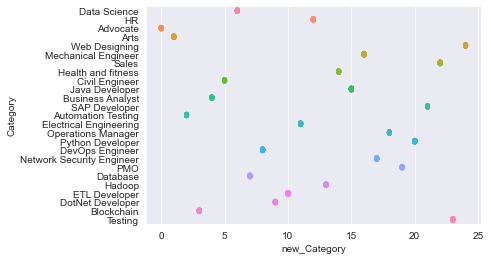

In [24]:
sns.stripplot(data=data, x="new_Category", y="Category")

(array([ 82.,  68.,  97.,  83.,  70., 116., 124.,  95.,  72., 155.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

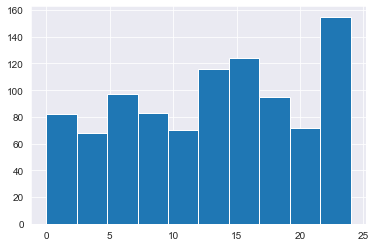

In [25]:
plt.hist(data['new_Category'])